### Problemática:

**¿Qué factores personales y comportamentales se relacionan con los ingresos individuales en la región Pampeana?**
Este análisis busca explorar variables como el sexo, la edad y el nivel educativo, así como ciertas prácticas financieras del hogar (pedir préstamos, comprar en cuotas o al fiado), se asocian con el nivel de ingreso declarado por las personas.
Se trabaja sobre la region Pampeana, ya que es una region de intereses, dado que algunos participantes del grupo viven en la region y sirve para poder conocer ciertas caracteristicas de su zona.

### Variables:
Las variables a trabajar son:

| Nombre Tabla  | Descripción                |
|---------------|----------------------------|
| P47T          | Ingreso total ind. (mes)   |
| NIVEL_ED      | Nivel educativo alcanzado  |
| CH04          | Sexo                       |
| CH06          | Edad en años cumplidos     |
| V14           | Piden préstamos a personas |
| V15           | Piden préstamos a bancos   |
| V16           | Compran en cuotas o fiado  |
| ESTADO        | Condición de actividad     |

### Población total y muestra:
Este trabajo se basa en los datos provistos por la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis se utilizaron tanto la base de datos de personas (individual) como la base de hogares, que fueron solapadas mediante el identificador común presente en ambas tablas (número de hogar y componente).
La población total a la que pertenecen estos datos es la población residente en la República Argentina, de acuerdo a la cobertura de la EPH. Esta población incluye tanto a personas económicamente activas como inactivas, y contempla diversos niveles educativos, edades y situaciones familiares.

Para el análisis se realizó un recorte geográfico, tomando únicamente los hogares y personas correspondientes a la región Pampeana, que abarca aglomerados urbanos en las provincias de Buenos Aires, Córdoba, Santa Fe, Entre Ríos y La Pampa. Elegimos esta región porque representa una parte muy importante de la población del país y tiene mucha variedad en cuanto a situaciones sociales y económicas. Esto nos permite analizar distintos casos dentro de una misma zona.

La muestra analizada se compone de personas con ingresos individuales declarados, que además cuentan con información sobre sexo, edad, nivel educativo, y variables asociadas al comportamiento económico del hogar, como la compra en cuotas, al fiado, o el acceso a préstamos. Este enfoque permitió estudiar relaciones entre los ingresos individuales y diversas características sociodemográficas y de consumo dentro de la región Pampeana.

### Clasificar las variables elegidas.
|Columna  | Variable                  | Tipo de variable       | Fuente (tabla)    |
|---------|---------------------------|------------------------|-------------------|
|P47T     | Ingreso individual        | Cuantitativa continua  | Base individual   |
|CH06     | Edad                      | Cuantitativa continua  | Base individual   |
|CH04     | Sexo                      | Cualitativa            | Base individual   |
|NIVEL_ED | Nivel educativo           | Cualitativa ordinal    | Base individual   |
|ESTADO   | Estado actividad          | Cualitativa            | Base individual   |
|V16      | Compra en cuotas o fiado  | Cualitativa            | Base de hogares   |
|V15      | Préstamo banco            | Cualitativa            | Base de hogares   |
|V14      | Préstamo personas         | Cualitativa            | Base de hogares   |

### Diagrama de Tablas vs Variables Seleccionadas
![Distribución de variables en Hogares y Personas](der.png)



### Carga de datos de las encuestas

In [103]:
import pandas as pd

hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

### Renombramiento de columnas con nombres mas intuitivos.

In [104]:
# Renombrar columnas de personas
renombrar_personas = {
    "CH04": "sexo",
    "CH06": "edad",
    "P47T": "ingreso",
    "NIVEL_ED": "nivel_educativo",
    "ESTADO": "estado_actividad",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
personas.rename(columns=renombrar_personas, inplace=True)

# Renombrar columnas de hogares
renombrar_hogares = {
    "V14": "prestamo_personas",
    "V15": "prestamo_banco",
    "V16": "compra_cuotas",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
hogares.rename(columns=renombrar_hogares, inplace=True)

##### Configuración de dependencias

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

Como se va a trabajar sobre la región Pampeana (Número 43) se filtra todas las filas que cumplan esa valor.

In [51]:
personas_fil_pam = personas[personas['region'] == 43]

In [106]:
print("Longitud Tabla Personas:", len(personas))
print("Longitud Tabla Personas Filtrada:", len(personas_fil_pam))


Longitud Tabla Personas: 47564
Longitud Tabla Personas Filtrada: 14315


Se redujo el total de la tabla personas un 30%.
Ahora se va a filtrar las columnas (variables) a trabajar:

In [107]:
personas_fil = personas_fil_pam[['id_vivienda', 'id_hogar', 'sexo', 'edad', 'ingreso', 'nivel_educativo', 'estado_actividad', 'region']]
personas_fil.head()

,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
0,TQRMNOPTVHLOKRCDEFJAH00803557,1,2,33,-9.0,6,1,43
1,TQRMNOPTVHLOKRCDEFJAH00803557,1,1,33,-9.0,6,1,43
2,TQRMNOQPRHKLKNCDEFJAH00868631,1,1,81,1750000.0,6,1,43
3,TQRMNOQPRHKLKNCDEFJAH00868631,1,2,78,400000.0,6,3,43
4,TQRMNORVXHKLKNCDEFJAH00868632,1,1,65,1200000.0,4,1,43


In [108]:
personas_fil.isnull().sum()

id_vivienda          0
id_hogar             0
sexo                 0
edad                 0
ingreso             15
nivel_educativo      0
estado_actividad     0
region               0
dtype: int64

Encontramos que en la columna de **Ingreso** hay 15 filas nulas. Sobre la variable de ingresos. Analizando filtramos las filas con valores nulos.

In [109]:
personasnulos = personas_fil[personas_fil.isnull().any(axis=1)]
personasnulos

,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
731,TQRMNOPYWHKMKMCDEFMDB00868439,1,2,56,NaN,4,0,43
4159,TQRMNOQRWHLNLPCDEIKAH00807963,1,1,53,NaN,2,0,43
5439,TQRMNOPRTHJOLSCDEFKID00862865,1,1,16,NaN,3,0,43
17606,TQRMNORXRHMNKMCDEFIAH00870738,1,1,56,NaN,4,0,43
19213,TQRMNOPXUHLKKRCDEFMDB00804085,1,1,37,NaN,4,0,43
19214,TQRMNOPXUHLKKRCDEFMDB00804085,1,2,39,NaN,6,0,43
21233,TQRMNOQVVHLMKTCDEGKDB00805043,2,1,41,NaN,4,0,43
25056,TQRMNOSSUHJKKTCDEFKID00870296,1,1,41,NaN,4,0,43
25057,TQRMNOSSUHJKKTCDEFKID00870296,1,2,35,NaN,6,0,43
39376,TQRMNOQPVHKNLQCDEFMDB00871976,1,1,45,NaN,4,0,43


Podemos observar que corresponde a que la encuesta NO HA SIDO RESPONDIDA (Codigo de Estado "0"). Por lo que proponemos dado que casi todos los datos (14/15) son mayores de edad, promediar el valor de ingreso mensual para completar los campos nulos a fin de poder utilizar los datos sin que afecte las medias muestrales.

In [110]:
promedio_ingresos = personas_fil['ingreso'].mean()
personas_fil.loc[:, 'ingreso'] = personas_fil['ingreso'].fillna(promedio_ingresos)

C:\Users\angel\AppData\Local\Temp\ipykernel_6380\4078023206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personas_fil.loc[:, 'ingreso'] = personas_fil['ingreso'].fillna(promedio_ingresos)


Hacemos un resumen rápido estádistico.

In [111]:
personas_fil.describe()

,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
count,14315.000000,14315.000000,14315.000000,1.431500e+04,14315.000000,14315.000000,14315.0
mean,1.028222,1.519246,37.258819,2.953922e+05,3.748795,2.182676,43.0
std,0.175046,0.499647,22.382583,4.932133e+05,1.774382,1.129003,0.0
min,1.000000,1.000000,0.000000,-9.000000e+00,1.000000,0.000000,43.0
25%,1.000000,1.000000,18.000000,0.000000e+00,2.000000,1.000000,43.0
50%,1.000000,2.000000,35.000000,0.000000e+00,4.000000,3.000000,43.0
75%,1.000000,2.000000,55.000000,4.300000e+05,5.000000,3.000000,43.0
max,4.000000,2.000000,102.000000,1.237000e+07,7.000000,4.000000,43.0


Hay un minimo de edad de -1 que no es lógico, y de ingresos -9. Y máximos en ingresos mensual marca como maximo $12.370.000 (puede ser correcto).
Viendo el comentario:

### Comentario General
![Observaciones Comentario](ComentarioGeneral.jpg)

Si bien no está explicado, el valor -1 de edad corresponde a edades menores a un año. Analizamos los valores de esas fechas:

In [124]:
personas_fil_pam = personas_fil_pam.copy()
personas_fil_pam.loc[:, 'CH05'] = pd.to_datetime(personas_fil_pam['CH05'], errors='coerce')
personas_fil_pam_ordenada = personas_fil_pam.sort_values(by='CH05')

C:\Users\angel\AppData\Local\Temp\ipykernel_6380\3306751936.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  personas_fil_pam.loc[:, 'CH05'] = pd.to_datetime(personas_fil_pam['CH05'], errors='coerce')


In [125]:
filas_edad = personas_fil_pam_ordenada[personas_fil_pam_ordenada['edad'] == -1]
filas_edad = filas_edad[['CH05', 'edad', 'ingreso']]
filas_edad

,CH05,edad,ingreso


In [126]:
filas_edad['ingreso'].value_counts()

Series([], Name: ingreso, dtype: int64)

In [127]:
filas_1900 = filas_edad[filas_edad['CH05'] == '1900-01-01']
cantidad_filas_1900 = len(filas_1900)
print(f"Cantidad de filas con '1900-01-01': {cantidad_filas_1900}")

Cantidad de filas con '1900-01-01': 0


Hay 21 filas que tienen como fecha "1900-01-01" y representan el 20% de los valores "-1" y estos representan casi el 0,14% de los datos totales de la muestra. Entendemos que se debe a un error y como no tienen ingresos declarados en las 101 filas, entendemos que no son parte del analisis del trabajo, por lo que se no trabajara con las filas que tengan ingreso igual a cero.

In [128]:
personas_sin_ingresos = personas_fil[personas_fil['ingreso'] == 0]
print('Cantidad de filas con ingresos igual a cero:', len(personas_sin_ingresos))

Cantidad de filas con ingresos igual a cero: 4761


Analizamos los datos -9 como no respondidos:

In [129]:
filas_cod9 = personas_fil[personas_fil['ingreso'] == -9]
print('cantidad de filas con ingresos -9:', len(filas_cod9))

cantidad de filas con ingresos -9: 2411


**** COMPLETAMOS LOS -9 CON EL PROMEDIO COMO LOS DATOS NULOS? ELIMINAMOS LOS INGRESOS IGUAL A CERO?

In [146]:
hogares_fil_pam = hogares[hogares['region'] == 43]
print("Longitud Tabla Hogares:", len(hogares))
print("Longitud Tabla Hogares Filtrada:", len(hogares_fil_pam))

Longitud Tabla Hogares: 16650
Longitud Tabla Hogares Filtrada: 5410


Se redujo el total de la tabla personas un 32%. Se tabaja sobre las variables de interés. Como las planillas se conectan con la columna "CODUSU" que es el Código para distinguir viviendas, permite aparearlas con Hogares y Personas.

In [147]:
hogares_fil = hogares_fil_pam[['id_vivienda', 'id_hogar', 'region', 'prestamo_personas', 'prestamo_banco', 'compra_cuotas']]


In [148]:
hogares_fil.head()

,id_vivienda,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
0,TQRMNOQVSHMMLOCDEFJAH00808791,1,43,2,2,1
1,TQRMNOPTQHKLLSCDEFJAH00866946,1,43,2,2,1
2,TQRMNORVTHMOLSCDEFJAH00808761,1,43,2,2,2
3,TQRMNORVVHMOLSCDEFJAH00866947,1,43,2,2,2
4,TQRMNOTPTHLNLRCDEFJAH00803474,1,43,2,2,2


In [149]:
hogares_fil.isnull().sum()


id_vivienda          0
id_hogar             0
region               0
prestamo_personas    0
prestamo_banco       0
compra_cuotas        0
dtype: int64

No hay filas nulas.

Hacemos un resumen rápido estádistico.

In [150]:
hogares_fil.describe()

,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
count,5410.000000,5410.0,5410.000000,5410.000000,5410.000000
mean,1.034566,43.0,1.851386,1.891682,1.529575
std,0.192548,0.0,0.370006,0.327041,0.509435
min,1.000000,43.0,1.000000,1.000000,1.000000
25%,1.000000,43.0,2.000000,2.000000,1.000000
50%,1.000000,43.0,2.000000,2.000000,2.000000
75%,1.000000,43.0,2.000000,2.000000,2.000000
max,4.000000,43.0,9.000000,9.000000,9.000000


Hay errores de ingreso de datos al tener maximos en "9" cuando permite 1 o 2, en cuanto a comportamientos de consumo-prestamos.

In [151]:
hogares_fil['prestamo_banco'].value_counts()

2    4816
1     593
9       1
Name: prestamo_banco, dtype: int64

In [152]:
hogares_fil['prestamo_personas'].value_counts()

2    4598
1     811
9       1
Name: prestamo_personas, dtype: int64

In [153]:
hogares_fil['compra_cuotas'].value_counts()

2    2857
1    2552
9       1
Name: compra_cuotas, dtype: int64

Vemos una Fila con el valor 9 en la columna de prestamos a personas, por lo que se revisara cada estas variables. Significa que no ha respondido.

Como es un único datos en cada columna, eliminamos las filas con valor 9 (son 3 en total)

In [154]:
hogares_fil = hogares_fil[hogares_fil['prestamo_banco'] != 9]

In [155]:
hogares_fil = hogares_fil[hogares_fil['prestamo_personas'] != 9]

In [156]:
hogares_fil = hogares_fil[hogares_fil['compra_cuotas'] != 9]

In [160]:
hogares_fil.describe()

,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
count,5409.000000,5409.0,5409.000000,5409.000000,5409.000000
mean,1.034572,43.0,1.850065,1.890368,1.528194
std,0.192565,0.0,0.357041,0.312460,0.499251
min,1.000000,43.0,1.000000,1.000000,1.000000
25%,1.000000,43.0,2.000000,2.000000,1.000000
50%,1.000000,43.0,2.000000,2.000000,2.000000
75%,1.000000,43.0,2.000000,2.000000,2.000000
max,4.000000,43.0,2.000000,2.000000,2.000000


### Personas y Hogares región Pampeana
Unimos ambas tablas a través de la variable "CODUSU"

In [163]:
df_final = pd.merge(personas_fil, hogares_fil, on=['id_vivienda', 'id_hogar', 'region'], how='inner')
len(df_final)


14313

In [164]:
df_final.head(15)


,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region,prestamo_personas,prestamo_banco,compra_cuotas
0,TQRMNOPTVHLOKRCDEFJAH00803557,1,2,33,-9.0,6,1,43,2,2,1
1,TQRMNOPTVHLOKRCDEFJAH00803557,1,1,33,-9.0,6,1,43,2,2,1
2,TQRMNOQPRHKLKNCDEFJAH00868631,1,1,81,1750000.0,6,1,43,2,2,2
3,TQRMNOQPRHKLKNCDEFJAH00868631,1,2,78,400000.0,6,3,43,2,2,2
4,TQRMNORVXHKLKNCDEFJAH00868632,1,1,65,1200000.0,4,1,43,2,1,1
5,TQRMNORVXHKLKNCDEFJAH00868632,1,2,66,435600.0,4,1,43,2,1,1
6,TQRMNORVXHKLKNCDEFJAH00868632,1,1,30,1125000.0,5,1,43,2,1,1
7,TQRMNQYTSHMOKQCDEFJAH00851671,1,1,63,-9.0,3,1,43,2,2,2
8,TQRMNQYTSHMOKQCDEFJAH00851671,1,2,60,0.0,3,3,43,2,2,2
9,TQRMNQYTSHMOKQCDEFJAH00851671,1,2,22,0.0,4,2,43,2,2,2


En este caso vamos a tener que agrupar las columnas de personas para resumirlas y trabajarlas junto con los datos de hogares.

### Tablas de Referencia

#### ESTADO - Condición de Actividad
Tipo de variable: Nominal

In [17]:
estado = pd.DataFrame([
    (0, "Encuesta no realizada"),
    (1, "Ocupado"),
    (2, "Desocupado"),
    (3, "Inactivo"),
    (4, "Menor de 10 años")
], columns=["estado_actividad", "estado_nombre"])

##### Datos faltantes
No hay registros con valores indefinidos.

In [18]:
personas_fil["estado_actividad"].isna().sum()

0

##### Análisis de Frecuencias

In [19]:
personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts()

estado_nombre
Ocupado                  6389
Inactivo                 5794
Menor de 10 años         1620
Desocupado                497
Encuesta no realizada      15
Name: count, dtype: int64

In [20]:
personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts(normalize=True)

estado_nombre
Ocupado                  0.446315
Inactivo                 0.404750
Menor de 10 años         0.113168
Desocupado               0.034719
Encuesta no realizada    0.001048
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7f221bcbc2b0>,
 [Text(0.24003667031668752, 1.4097100400093907, 'Ocupado'),
  Text(-0.8500254030457036, -1.1499377436091875, 'Inactivo'),
  Text(1.1959405494372304, -0.7839809960782059, 'Menor de 10 años'),
  Text(1.4204465464286657, -0.1650200252662591, 'Desocupado'),
  Text(1.4299922515673409, -0.004707489497283461, 'Encuesta no realizada')],
 [Text(0.17457212386668183, 1.025243665461375, '44.63%'),
  Text(-0.618200293124148, -0.8363183589884999, '40.48%'),
  Text(0.8697749450452583, -0.5701679971477861, '11.32%'),
  Text(1.0330520337663023, -0.12001456383000662, '3.47%'),
  Text(1.039994364776248, -0.0034236287252970626, '0.10%')])

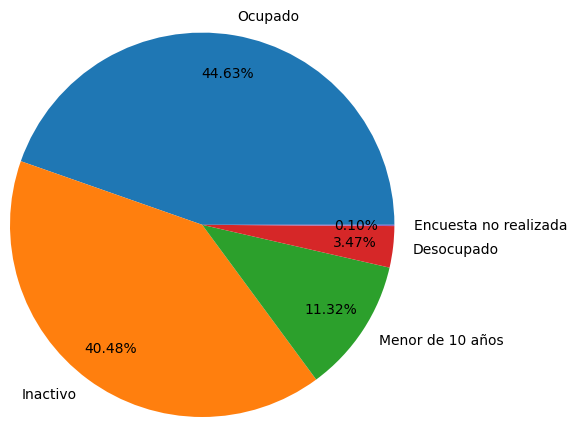

In [21]:
frecuencias = personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts()
plt.pie(frecuencias, labels=frecuencias.index, autopct="%.2f%%", pctdistance=0.8, labeldistance=1.1, radius=1.3)


#### NIVEL_ED - Nivel Educativo

Tipo de Variable: Ordinal


In [22]:
nivel_educativo = pd.DataFrame([
    (1, "Primario incompleto (incluye educación especial)"),
    (2, "Primario completo"),
    (3, "Secundario incompleto"),
    (4, "Secundario completo"),
    (5, "Superior universitario incompleto"),
    (6, "Superior universitario completo"),
    (7, "Sin instrucción"),
    (9, "Ns/Nr"),
    ], columns=["nivel_educativo", "nivel_educativo_nombre"])



#### Datos faltantes

No hay registros con valores indefinidos.


In [23]:
personas_fil["nivel_educativo"].isna().sum()

0

#### Análisis de Frecuencias

In [24]:
personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo")[["nivel_educativo","nivel_educativo_nombre"]].value_counts()

nivel_educativo  nivel_educativo_nombre                          
4                Secundario completo                                 2965
3                Secundario incompleto                               2887
6                Superior universitario completo                     2156
1                Primario incompleto (incluye educación especial)    2016
5                Superior universitario incompleto                   1743
2                Primario completo                                   1672
7                Sin instrucción                                      876
Name: count, dtype: int64

In [25]:
personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo")["nivel_educativo_nombre"].value_counts(normalize=True)

nivel_educativo_nombre
Secundario completo                                 0.207125
Secundario incompleto                               0.201677
Superior universitario completo                     0.150611
Primario incompleto (incluye educación especial)    0.140831
Superior universitario incompleto                   0.121760
Primario completo                                   0.116801
Sin instrucción                                     0.061195
Name: proportion, dtype: float64

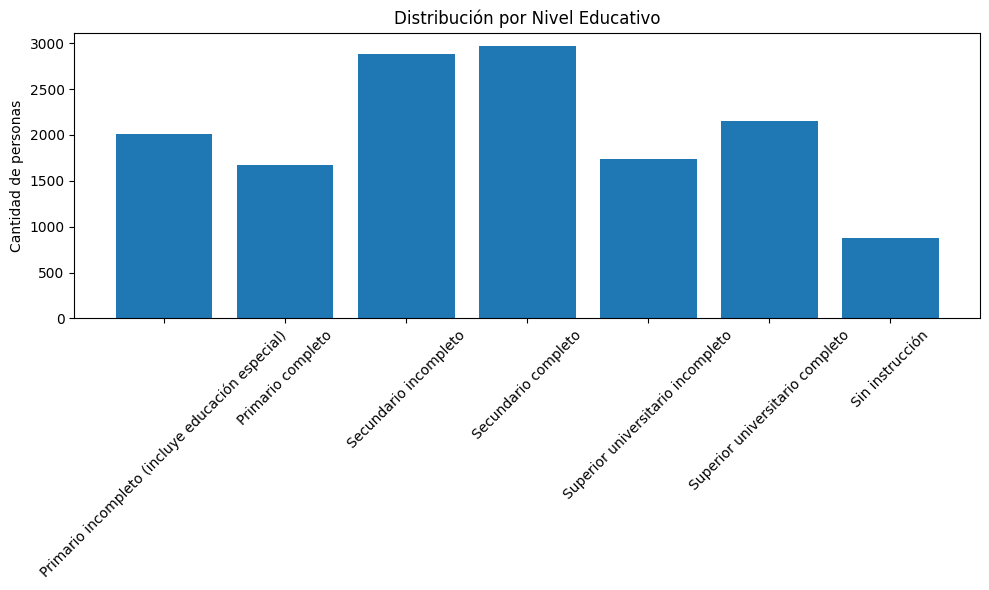

In [26]:
frecuencias = personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo") \
    [["nivel_educativo", "nivel_educativo_nombre"]].value_counts() \
    .reset_index(name='nivel_educativo_count') \
    .sort_values("nivel_educativo")

plt.figure(figsize=(10, 6))
plt.bar(frecuencias["nivel_educativo_nombre"], frecuencias["nivel_educativo_count"])
plt.xticks(rotation=45)
plt.title("Distribución por Nivel Educativo")
plt.ylabel("Cantidad de personas")
plt.tight_layout()
plt.show()



#### Variable Edad
Tipo de variable: Continua

In [165]:
personas_fil["edad"].describe()

count    14315.000000
mean        37.258819
std         22.382583
min          0.000000
25%         18.000000
50%         35.000000
75%         55.000000
max        102.000000
Name: edad, dtype: float64

Text(0.5, 1.0, 'Distribución de edades')

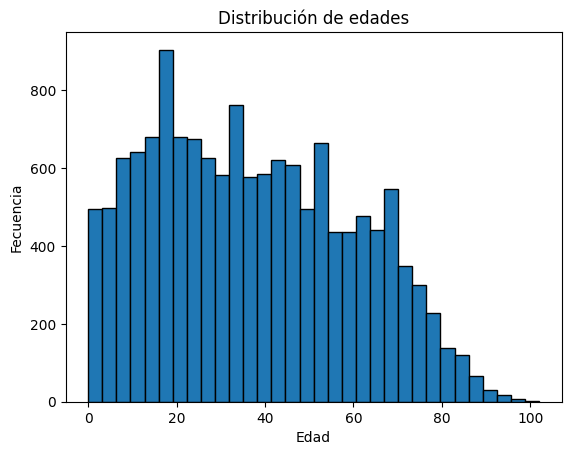

In [166]:
bin_edges = np.histogram_bin_edges(personas_fil["edad"], bins='scott')
plt.hist(personas_fil["edad"], edgecolor='black', bins=bin_edges)
plt.xlabel('Edad')
plt.ylabel('Fecuencia')
plt.title("Distribución de edades")

#### Variable: Sexo
Varieble cualititativa

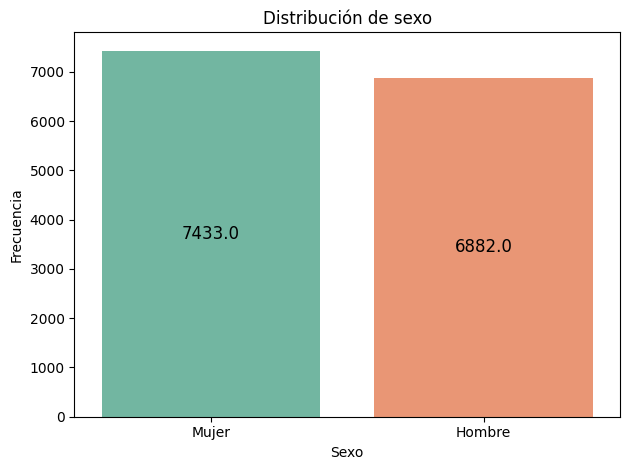

In [ ]:

personas_fil['sexo'] = personas_fil['sexo'].map({1: 'Hombre', 2: 'Mujer'})
ax = sns.countplot(x='sexo', data=personas_fil, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, 
        height * 0.5,
        str(height),  
        ha='center', va='center', 
        color='black', fontsize=12
    )

# Títulos y etiquetas
plt.title('Distribución de sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()